In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Covid_19_Clean_Complete-TA-Ajinkya.zip')

In [ ]:
df.shape

(49068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df.rename(
    columns={'Province/State':'State','Country/Region':'Country'},
    inplace=True
)

In [ ]:
df

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [ ]:
grouped=df.groupby(['Country'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
grouped

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [ ]:
df_conf_date=df.groupby('Date')['Confirmed'].sum().reset_index()
df_conf_date

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


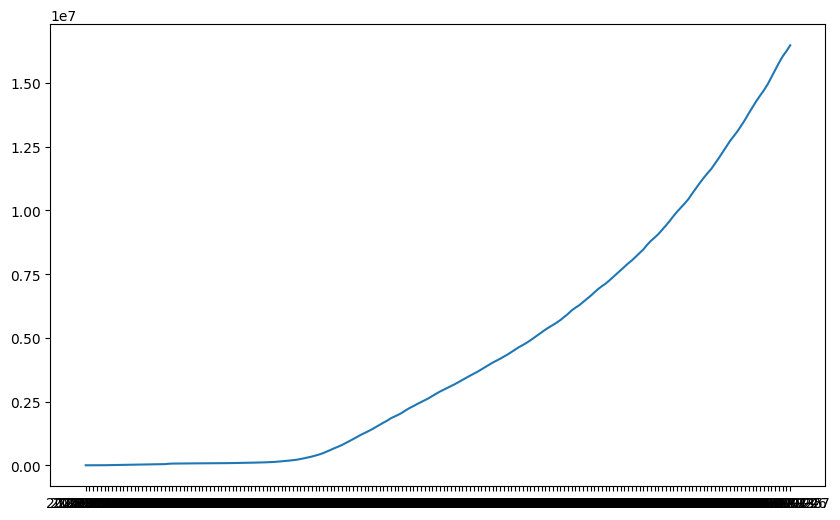

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_conf_date['Date'],df_conf_date['Confirmed'])

In [ ]:
df_active_date=df.groupby('Date')['Active'].sum().reset_index()
df_active_date

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


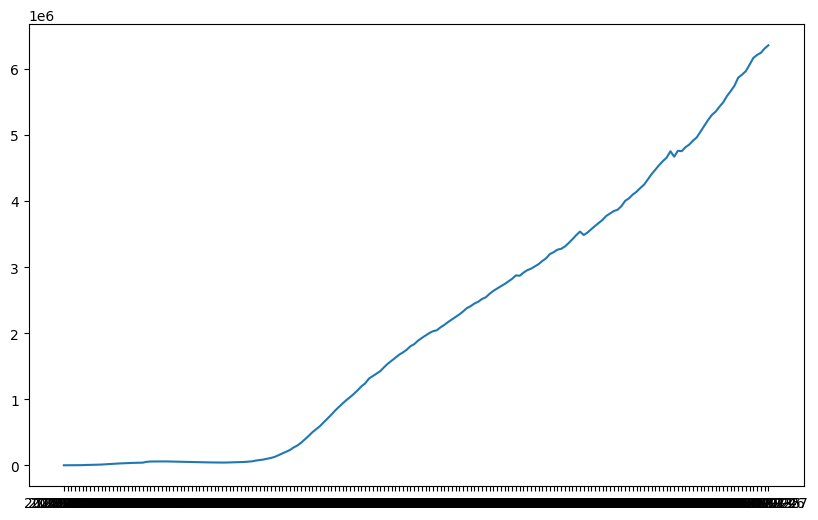

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_active_date['Date'],df_active_date['Active'])

In [ ]:
df_deaths_date=df.groupby('Date')['Deaths'].sum().reset_index()
df_deaths_date

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


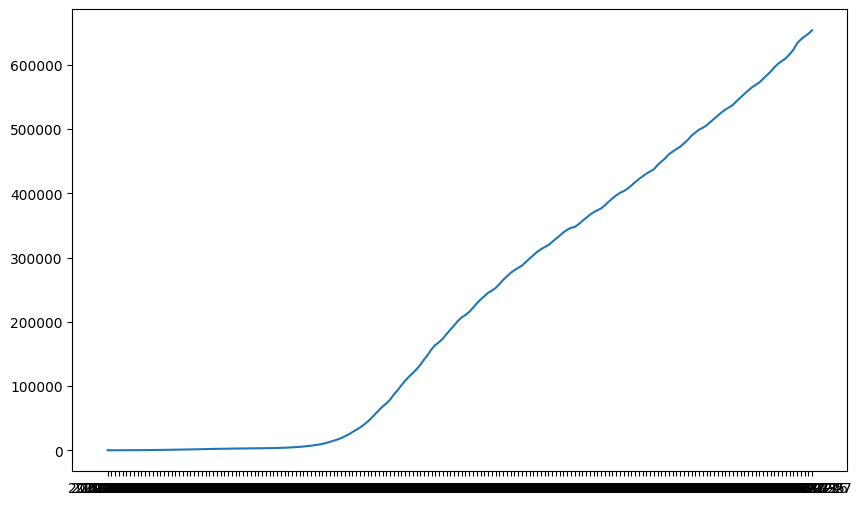

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_deaths_date['Date'],df_deaths_date['Deaths'])

In [ ]:
df_recov_date=df.groupby('Date')['Recovered'].sum().reset_index()
df_recov_date

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


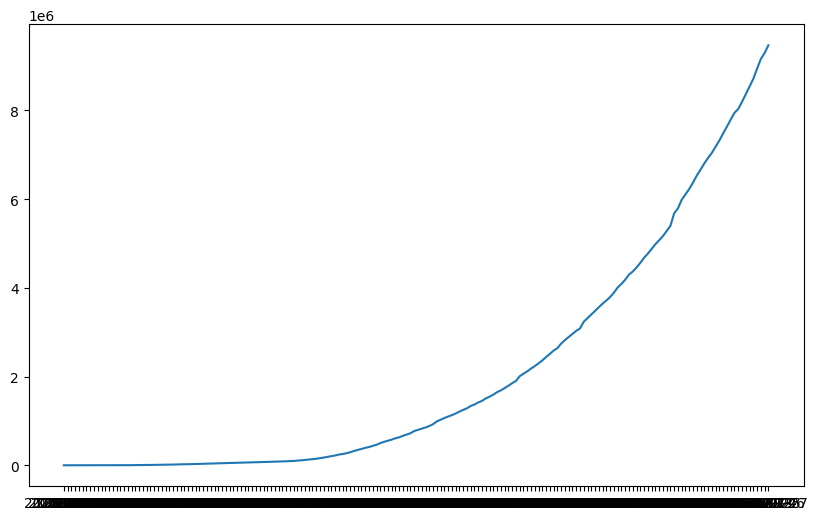

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_recov_date['Date'],df_recov_date['Recovered'])

In [ ]:
!pip install Prophet

In [ ]:
from prophet import Prophet

#its mandtory to give the date column as ds and target as y

In [ ]:
df_conf_date.columns=['ds','y']
df_conf_date

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
model=Prophet()

In [ ]:
model.fit(df_conf_date)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=7)
forcasted_data=model.predict(future)

In [ ]:
forcasted_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613288e+03,-1.244070e+05,8.440001e+04,-9.613288e+03,-9.613288e+03,-11063.558307,-11063.558307,-11063.558307,-11063.558307,-11063.558307,-11063.558307,0.0,0.0,0.0,-2.067685e+04
1,2020-01-23,-6.933409e+03,-1.116415e+05,9.540266e+04,-6.933409e+03,-6.933409e+03,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,0.0,0.0,0.0,-8.050953e+03
2,2020-01-24,-4.253530e+03,-9.943446e+04,1.063586e+05,-4.253530e+03,-4.253530e+03,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,0.0,0.0,0.0,5.827449e+03
3,2020-01-25,-1.573651e+03,-1.000407e+05,1.190229e+05,-1.573651e+03,-1.573651e+03,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106228e+03,-9.528911e+04,1.135907e+05,1.106228e+03,1.106228e+03,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663996e+07,1.685285e+07,1.673895e+07,1.675240e+07,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,-1117.543863,0.0,0.0,0.0,1.674392e+07
191,2020-07-31,1.694902e+07,1.685628e+07,1.705873e+07,1.693531e+07,1.696317e+07,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,10080.978737,0.0,0.0,0.0,1.695911e+07
192,2020-08-01,1.715301e+07,1.706000e+07,1.728151e+07,1.713040e+07,1.717507e+07,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,13750.326871,0.0,0.0,0.0,1.716677e+07
193,2020-08-02,1.735701e+07,1.724786e+07,1.747559e+07,1.732298e+07,1.738953e+07,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,7298.791978,0.0,0.0,0.0,1.736430e+07


In [ ]:
forcasted_data[['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-1.244070e+05,-2.067685e+04,8.440001e+04
1,-1.116415e+05,-8.050953e+03,9.540266e+04
2,-9.943446e+04,5.827449e+03,1.063586e+05
3,-1.000407e+05,1.217668e+04,1.190229e+05
4,-9.528911e+04,8.405020e+03,1.135907e+05
...,...,...,...
190,1.663996e+07,1.674392e+07,1.685285e+07
191,1.685628e+07,1.695911e+07,1.705873e+07
192,1.706000e+07,1.716677e+07,1.728151e+07
193,1.724786e+07,1.736430e+07,1.747559e+07


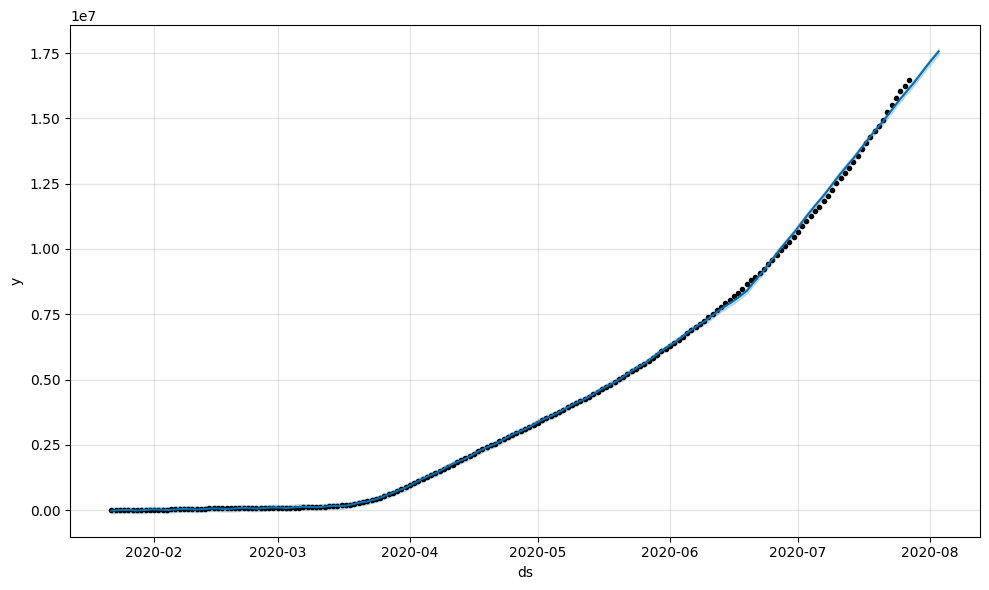

In [ ]:
model.plot(forcasted_data)
plt.show()

In [ ]:
df_deaths_date.columns=['ds','y']
df_deaths_date

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
model2=Prophet()

In [ ]:
model2.fit(df_deaths_date)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future2=model2.make_future_dataframe(periods=7)
forcasted_data2=model2.predict(future2)

In [ ]:
forcasted_data2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-522.113185,-2629.595971,1246.762153,-522.113185,-522.113185,-191.187755,-191.187755,-191.187755,-191.187755,-191.187755,-191.187755,0.0,0.0,0.0,-713.300939
1,2020-01-23,-432.419342,-1989.886342,1932.032393,-432.419342,-432.419342,388.672065,388.672065,388.672065,388.672065,388.672065,388.672065,0.0,0.0,0.0,-43.747277
2,2020-01-24,-342.725499,-1535.693132,2463.171427,-342.725499,-342.725499,874.264079,874.264079,874.264079,874.264079,874.264079,874.264079,0.0,0.0,0.0,531.538580
3,2020-01-25,-253.031656,-1391.215418,2585.557511,-253.031656,-253.031656,726.889465,726.889465,726.889465,726.889465,726.889465,726.889465,0.0,0.0,0.0,473.857809
4,2020-01-26,-163.337813,-2278.049865,1624.222618,-163.337813,-163.337813,-165.600459,-165.600459,-165.600459,-165.600459,-165.600459,-165.600459,0.0,0.0,0.0,-328.938272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,663102.734264,661460.054690,665735.427380,662742.386270,663433.311509,388.672065,388.672065,388.672065,388.672065,388.672065,388.672065,0.0,0.0,0.0,663491.406328
191,2020-07-31,668132.143204,666797.119244,671250.585705,667426.344003,668801.004645,874.264079,874.264079,874.264079,874.264079,874.264079,874.264079,0.0,0.0,0.0,669006.407283
192,2020-08-01,673161.552144,671569.284778,676302.768353,672080.837621,674259.949209,726.889465,726.889465,726.889465,726.889465,726.889465,726.889465,0.0,0.0,0.0,673888.441609
193,2020-08-02,678190.961084,675319.103400,680757.460885,676599.876172,679734.790550,-165.600459,-165.600459,-165.600459,-165.600459,-165.600459,-165.600459,0.0,0.0,0.0,678025.360624


In [ ]:
forcasted_data2[['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-2629.595971,-713.300939,1246.762153
1,-1989.886342,-43.747277,1932.032393
2,-1535.693132,531.538580,2463.171427
3,-1391.215418,473.857809,2585.557511
4,-2278.049865,-328.938272,1624.222618
...,...,...,...
190,661460.054690,663491.406328,665735.427380
191,666797.119244,669006.407283,671250.585705
192,671569.284778,673888.441609,676302.768353
193,675319.103400,678025.360624,680757.460885


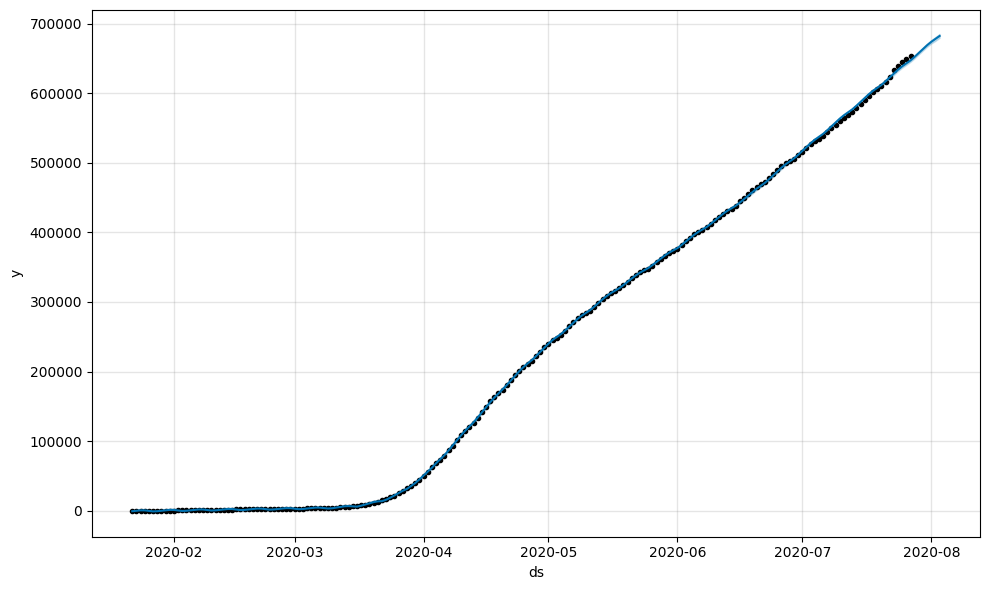

In [ ]:
model2.plot(forcasted_data2)
plt.show()

In [ ]:
df_recov_date.columns=['ds','y']
df_recov_date

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
model3=Prophet()

In [ ]:
model3.fit(df_recov_date)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future3=model3.make_future_dataframe(periods=7)
forcasted_data3=model3.predict(future3)

In [ ]:
forcasted_data3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-1.360144e+04,-1.004895e+05,6.128222e+04,-1.360144e+04,-1.360144e+04,-4840.633687,-4840.633687,-4840.633687,-4840.633687,-4840.633687,-4840.633687,0.0,0.0,0.0,-1.844208e+04
1,2020-01-23,-1.243662e+04,-9.522719e+04,6.185582e+04,-1.243662e+04,-1.243662e+04,1254.797967,1254.797967,1254.797967,1254.797967,1254.797967,1254.797967,0.0,0.0,0.0,-1.118182e+04
2,2020-01-24,-1.127180e+04,-8.446118e+04,7.488201e+04,-1.127180e+04,-1.127180e+04,6096.150124,6096.150124,6096.150124,6096.150124,6096.150124,6096.150124,0.0,0.0,0.0,-5.175647e+03
3,2020-01-25,-1.010697e+04,-7.861272e+04,7.706749e+04,-1.010697e+04,-1.010697e+04,9699.442818,9699.442818,9699.442818,9699.442818,9699.442818,9699.442818,0.0,0.0,0.0,-4.075311e+02
4,2020-01-26,-8.942151e+03,-9.128992e+04,6.541883e+04,-8.942151e+03,-8.942151e+03,-883.479296,-883.479296,-883.479296,-883.479296,-883.479296,-883.479296,0.0,0.0,0.0,-9.825630e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,9.594538e+06,9.514076e+06,9.681053e+06,9.592083e+06,9.597612e+06,1254.797967,1254.797967,1254.797967,1254.797967,1254.797967,1254.797967,0.0,0.0,0.0,9.595793e+06
191,2020-07-31,9.731096e+06,9.657025e+06,9.816001e+06,9.724196e+06,9.738091e+06,6096.150124,6096.150124,6096.150124,6096.150124,6096.150124,6096.150124,0.0,0.0,0.0,9.737193e+06
192,2020-08-01,9.867654e+06,9.795439e+06,9.960804e+06,9.856010e+06,9.879326e+06,9699.442818,9699.442818,9699.442818,9699.442818,9699.442818,9699.442818,0.0,0.0,0.0,9.877354e+06
193,2020-08-02,1.000421e+07,9.918087e+06,1.009296e+07,9.987503e+06,1.002233e+07,-883.479296,-883.479296,-883.479296,-883.479296,-883.479296,-883.479296,0.0,0.0,0.0,1.000333e+07


In [ ]:
forcasted_data3[['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-1.004895e+05,-1.844208e+04,6.128222e+04
1,-9.522719e+04,-1.118182e+04,6.185582e+04
2,-8.446118e+04,-5.175647e+03,7.488201e+04
3,-7.861272e+04,-4.075311e+02,7.706749e+04
4,-9.128992e+04,-9.825630e+03,6.541883e+04
...,...,...,...
190,9.514076e+06,9.595793e+06,9.681053e+06
191,9.657025e+06,9.737193e+06,9.816001e+06
192,9.795439e+06,9.877354e+06,9.960804e+06
193,9.918087e+06,1.000333e+07,1.009296e+07


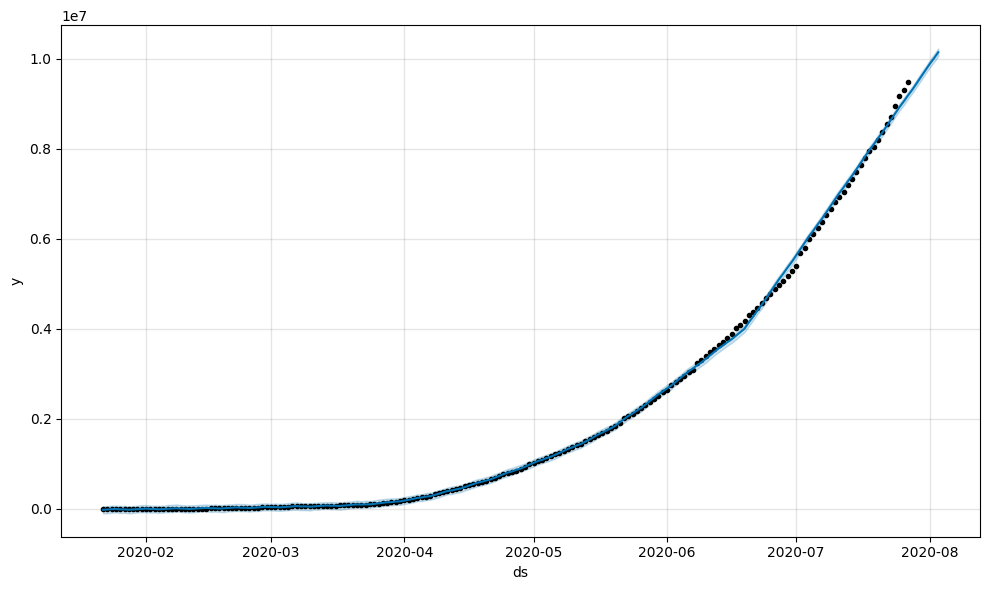

In [ ]:
model3.plot(forcasted_data3)
plt.show()

In [ ]:
df_active_date.columns=['ds','y']
df_active_date

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [ ]:
model4=Prophet()

In [ ]:
model4.fit(df_active_date)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future4=model4.make_future_dataframe(periods=7)
forcasted_data4=model4.predict(future4)

In [ ]:
forcasted_data4

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5.051891e+02,-5.020377e+04,3.772039e+04,-5.051891e+02,-5.051891e+02,-5734.815309,-5734.815309,-5734.815309,-5734.815309,-5734.815309,-5734.815309,0.0,0.0,0.0,-6.240004e+03
1,2020-01-23,1.357197e+03,-4.687459e+04,4.640512e+04,1.357197e+03,1.357197e+03,-2543.415441,-2543.415441,-2543.415441,-2543.415441,-2543.415441,-2543.415441,0.0,0.0,0.0,-1.186218e+03
2,2020-01-24,3.219584e+03,-3.687712e+04,5.342028e+04,3.219584e+03,3.219584e+03,3230.785517,3230.785517,3230.785517,3230.785517,3230.785517,3230.785517,0.0,0.0,0.0,6.450369e+03
3,2020-01-25,5.081970e+03,-3.634152e+04,5.364396e+04,5.081970e+03,5.081970e+03,3128.006715,3128.006715,3128.006715,3128.006715,3128.006715,3128.006715,0.0,0.0,0.0,8.209977e+03
4,2020-01-26,6.944356e+03,-3.016354e+04,6.276673e+04,6.944356e+03,6.944356e+03,8151.913171,8151.913171,8151.913171,8151.913171,8151.913171,8151.913171,0.0,0.0,0.0,1.509627e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,6.483822e+06,6.437779e+06,6.527899e+06,6.481782e+06,6.486684e+06,-2543.415441,-2543.415441,-2543.415441,-2543.415441,-2543.415441,-2543.415441,0.0,0.0,0.0,6.481279e+06
191,2020-07-31,6.546090e+06,6.501295e+06,6.593510e+06,6.541496e+06,6.551817e+06,3230.785517,3230.785517,3230.785517,3230.785517,3230.785517,3230.785517,0.0,0.0,0.0,6.549320e+06
192,2020-08-01,6.608357e+06,6.563964e+06,6.660934e+06,6.600217e+06,6.618137e+06,3128.006715,3128.006715,3128.006715,3128.006715,3128.006715,3128.006715,0.0,0.0,0.0,6.611485e+06
193,2020-08-02,6.670624e+06,6.626895e+06,6.727562e+06,6.658834e+06,6.685490e+06,8151.913171,8151.913171,8151.913171,8151.913171,8151.913171,8151.913171,0.0,0.0,0.0,6.678776e+06


In [ ]:
forcasted_data4[['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-5.020377e+04,-6.240004e+03,3.772039e+04
1,-4.687459e+04,-1.186218e+03,4.640512e+04
2,-3.687712e+04,6.450369e+03,5.342028e+04
3,-3.634152e+04,8.209977e+03,5.364396e+04
4,-3.016354e+04,1.509627e+04,6.276673e+04
...,...,...,...
190,6.437779e+06,6.481279e+06,6.527899e+06
191,6.501295e+06,6.549320e+06,6.593510e+06
192,6.563964e+06,6.611485e+06,6.660934e+06
193,6.626895e+06,6.678776e+06,6.727562e+06


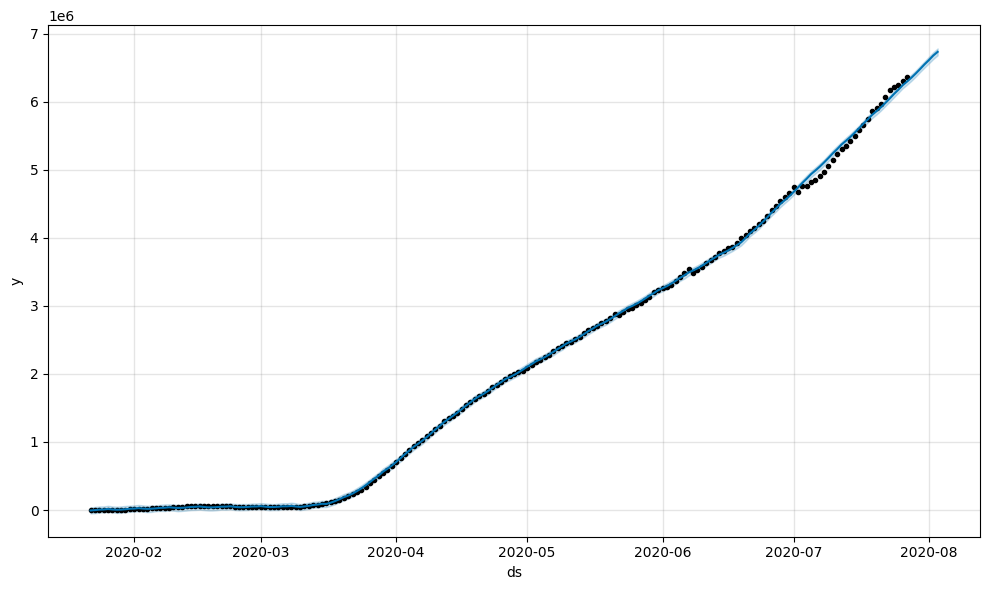

In [ ]:
model4.plot(forcasted_data4)
plt.show()

In [ ]:
world=df.groupby(['Country'])[['Confirmed'	,'Deaths'	,'Recovered',	'Active'	]].sum().reset_index()
world

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [ ]:
import plotly
import plotly.express as ex

In [ ]:
figure=ex.choropleth(world,locations='Country',locationmode='country names',color='Active',hover_name='Country',range_color=[1,100000],color_continuous_scale='reds',title='World map showing all the actives cases ')
figure.show()